### This script makes barplot for LR pairs that are specific to a cell type

In [3]:
import numpy as np
import csv
import pickle
import matplotlib
import math
from itertools import combinations
import pandas as pd
import matplotlib

In [6]:
def readCsv(x):
  """Parse file."""
  #colNames = ["method", "benchmark", "start", "end", "time", "memory"]
  df = pd.read_csv(x, sep=",")

  return df

def preprocessDf(df):
  """Transform ligand and receptor columns."""
  df["ligand-receptor"] = df["ligand"] + '-' + df["receptor"]
  df["component"] = df["component"] #.astype(str).str.zfill(2)

  return df

In [7]:
# Load metadata of sample
# Load gene_ids
gene_ids = []
with open("/Users/victoriagao/local_docs/NEST/stored_variables/gene_ids.txt", 'r') as file:
    for line in file:
        # Remove trailing newline characters and any leading/trailing whitespaces
        line = line.strip()
        gene_ids.append(line)

# Load coordinates
coordinates = np.load("/Users/victoriagao/local_docs/NEST/stored_variables/coordinates.npy")

# Load cell_barcode
with open('/Users/victoriagao/local_docs/NEST/stored_variables/cell_barcode.pkl', 'rb') as file:
    cell_barcode = pickle.load(file)

# Load connected_components (assume already have it)
with open("/Users/victoriagao/local_docs/NEST/stored_variables/filtered_connected_components.pkl", 'rb') as file:
    filtered_connected_components = pickle.load(file)

# Load pathologist's label
data_name = 'PDAC_64630'
if data_name == 'PDAC_64630':
    pathologist_label_file='/Users/victoriagao/local_docs/NEST/input/pathologist_annot/IX_annotation_artifacts_PDAC64630.csv' #IX_annotation_artifacts.csv' #
    pathologist_label=[]
    with open(pathologist_label_file) as file:
        csv_file = csv.reader(file, delimiter=",")
        for line in csv_file:
            pathologist_label.append(line)	
    	
    barcode_type=dict() # record the type (annotation) of each spot (barcode)
    for i in range (1, len(pathologist_label)):
        barcode_type[pathologist_label[i][0]] = pathologist_label[i][1]

# Load subtype label
# subtype_label_file='/Users/victoriagao/local_docs/schwartz_data/PDAC_64630_subtype.csv'
subtype_label_file='/Users/victoriagao/Documents/MSc/Schwartz_lab/experiment_data/Deisha/PDAC_64630/fractional_abundances_by_spot.csv'
subtype_abundance_df = readCsv(subtype_label_file)

In [8]:
# Load NEST output
df = readCsv("/Users/victoriagao/local_docs/NEST/output/From_Fatema/NEST_combined_output_PDAC_64630.csv")
output_processed = preprocessDf(df)



In [9]:
subtype_abundance_df

,SpotID,Endothelial,ClassicA,Fibroblast,Duct,Endocrine,Mixed,BasalB,NKCell,Acinar,BasalA,BPlasmaCell,ClassicB,TCell,Macrophage,Mast
0,CTACTATCATAGGTTT-1,0.5,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GAAGAACGGTGCAGGT-1,0.5,0.166667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TTCTAGGCCAATTGTG-1,0.2,0.000000,0.200000,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TGTGTTCGTATCCAAG-1,0.2,0.000000,0.200000,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0
4,CGAGCGTTGATCAGCC-1,0.5,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,CGTGCAGACTGGGACA-1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1402,AGTTCCTATTTATGTT-1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1403,TTGCGTCGGCCAACCG-1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1404,GCTGCACGGTTTCTTA-1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
output_processed


,from_cell,to_cell,ligand,receptor,attention_score,component,from_id,to_id,ligand-receptor
0,ACGCGCTACACAGGGT-1,AAACCGGGTAGGTACC-1,LGALS3,NPTN,0.911919,2,132,0,LGALS3-NPTN
1,TCTTACTTATGCCTCT-1,AAAGTGTGATTTATCT-1,FN1,RPSA,0.929988,6,1228,9,FN1-RPSA
2,AGTCTCACAAGACTAC-1,AAATTGATAGTCCTTT-1,PTPRF,RACK1,0.911508,10,228,15,PTPRF-RACK1
3,GTGGGCTTAGACACAC-1,AACAACTGGTAGTTGC-1,FN1,RPSA,0.923395,11,992,17,FN1-RPSA
4,CCACAGTACCCATCCT-1,AACCGCTAAGGGATGC-1,FN1,RPSA,0.929303,16,425,23,FN1-RPSA
...,...,...,...,...,...,...,...,...,...
1088,AACGTCAGACTAGTGG-1,TTGGCTCGCATGAGAC-1,TGFB1,EGFR,0.839991,17,31,1389,TGFB1-EGFR
1089,AGATTATAGGACGTTT-1,TTGTAATCCGTACTCG-1,TGFB1,ITGB5,0.829314,9,184,1394,TGFB1-ITGB5
1090,AGATTATAGGACGTTT-1,TTGTAATCCGTACTCG-1,TGFB1,SDC2,0.855152,9,184,1394,TGFB1-SDC2
1091,GAGAGGTGCATTCTGG-1,TTGTTTCCATACAACT-1,TGFB1,EGFR,0.830097,2,715,1404,TGFB1-EGFR


In [11]:
### Merge NEST output with subtype label, and filter out the spots that are not in the subtype label
matched_spots_df = pd.merge(output_processed, subtype_abundance_df, left_on='from_cell', right_on='SpotID') # Change from_cell to to_cell if interested in the receptors

In [12]:
matched_spots_df

,from_cell,to_cell,ligand,receptor,attention_score,component,from_id,to_id,ligand-receptor,SpotID,...,Mixed,BasalB,NKCell,Acinar,BasalA,BPlasmaCell,ClassicB,TCell,Macrophage,Mast
0,ACGCGCTACACAGGGT-1,AAACCGGGTAGGTACC-1,LGALS3,NPTN,0.911919,2,132,0,LGALS3-NPTN,ACGCGCTACACAGGGT-1,...,0.2,0.0,0.00,0.0,0.0,0.20,0.0,0.0,0.6,0.0
1,TCTTACTTATGCCTCT-1,AAAGTGTGATTTATCT-1,FN1,RPSA,0.929988,6,1228,9,FN1-RPSA,TCTTACTTATGCCTCT-1,...,0.0,0.0,0.00,0.0,0.0,1.00,0.0,0.0,0.0,0.0
2,AGTCTCACAAGACTAC-1,AAATTGATAGTCCTTT-1,PTPRF,RACK1,0.911508,10,228,15,PTPRF-RACK1,AGTCTCACAAGACTAC-1,...,0.0,0.0,0.00,0.0,0.0,1.00,0.0,0.0,0.0,0.0
3,GTGGGCTTAGACACAC-1,AACAACTGGTAGTTGC-1,FN1,RPSA,0.923395,11,992,17,FN1-RPSA,GTGGGCTTAGACACAC-1,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,CCACAGTACCCATCCT-1,AACCGCTAAGGGATGC-1,FN1,RPSA,0.929303,16,425,23,FN1-RPSA,CCACAGTACCCATCCT-1,...,0.0,0.0,0.25,0.0,0.0,0.50,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,AACGTCAGACTAGTGG-1,TTGGCTCGCATGAGAC-1,TGFB1,EGFR,0.839991,17,31,1389,TGFB1-EGFR,AACGTCAGACTAGTGG-1,...,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0
1089,AGATTATAGGACGTTT-1,TTGTAATCCGTACTCG-1,TGFB1,ITGB5,0.829314,9,184,1394,TGFB1-ITGB5,AGATTATAGGACGTTT-1,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.6,0.0,0.2
1090,AGATTATAGGACGTTT-1,TTGTAATCCGTACTCG-1,TGFB1,SDC2,0.855152,9,184,1394,TGFB1-SDC2,AGATTATAGGACGTTT-1,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.6,0.0,0.2
1091,GAGAGGTGCATTCTGG-1,TTGTTTCCATACAACT-1,TGFB1,EGFR,0.830097,2,715,1404,TGFB1-EGFR,GAGAGGTGCATTCTGG-1,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [13]:
# filter out the LR that only appeared once
matched_spots_df = matched_spots_df[matched_spots_df['ligand-receptor'].duplicated(keep=False)] 
# Take only top 90% LR by frequency
lr_counts = matched_spots_df['ligand-receptor'].value_counts()
threshold = lr_counts.quantile(0.50)  # gives the value at the 50th percentile
top_percent_lrs = lr_counts[lr_counts >= threshold].index
matched_spots_df = matched_spots_df[matched_spots_df['ligand-receptor'].isin(top_percent_lrs)]
# Delete some columns
matched_spots_df = matched_spots_df.drop(columns=['to_cell', 'ligand', 'receptor', 'attention_score', 'component', 'from_id','to_id','SpotID'])

In [14]:
matched_spots_df

,from_cell,ligand-receptor,Endothelial,ClassicA,Fibroblast,Duct,Endocrine,Mixed,BasalB,NKCell,Acinar,BasalA,BPlasmaCell,ClassicB,TCell,Macrophage,Mast
0,ACGCGCTACACAGGGT-1,LGALS3-NPTN,0.000000,0.00,0.000000,0.0,0.0,0.200000,0.000000,0.00,0.0,0.0,0.20,0.0,0.0,0.600000,0.0
1,TCTTACTTATGCCTCT-1,FN1-RPSA,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,1.00,0.0,0.0,0.000000,0.0
2,AGTCTCACAAGACTAC-1,PTPRF-RACK1,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,1.00,0.0,0.0,0.000000,0.0
3,GTGGGCTTAGACACAC-1,FN1-RPSA,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.000000,0.0
4,CCACAGTACCCATCCT-1,FN1-RPSA,0.000000,0.25,0.000000,0.0,0.0,0.000000,0.000000,0.25,0.0,0.0,0.50,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,AAGAGGATGTACGCGA-1,LAMC2-ITGA6,0.000000,0.00,0.000000,0.0,0.0,0.285714,0.571429,0.00,0.0,0.0,0.00,0.0,0.0,0.142857,0.0
1087,AACGTCAGACTAGTGG-1,TGFB1-ITGB5,0.000000,0.00,0.750000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.25,0.0,0.0,0.000000,0.0
1088,AACGTCAGACTAGTGG-1,TGFB1-EGFR,0.000000,0.00,0.750000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.25,0.0,0.0,0.000000,0.0
1089,AGATTATAGGACGTTT-1,TGFB1-ITGB5,0.000000,0.00,0.200000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.00,0.0,0.6,0.000000,0.2


<Axes: xlabel='ligand-receptor'>

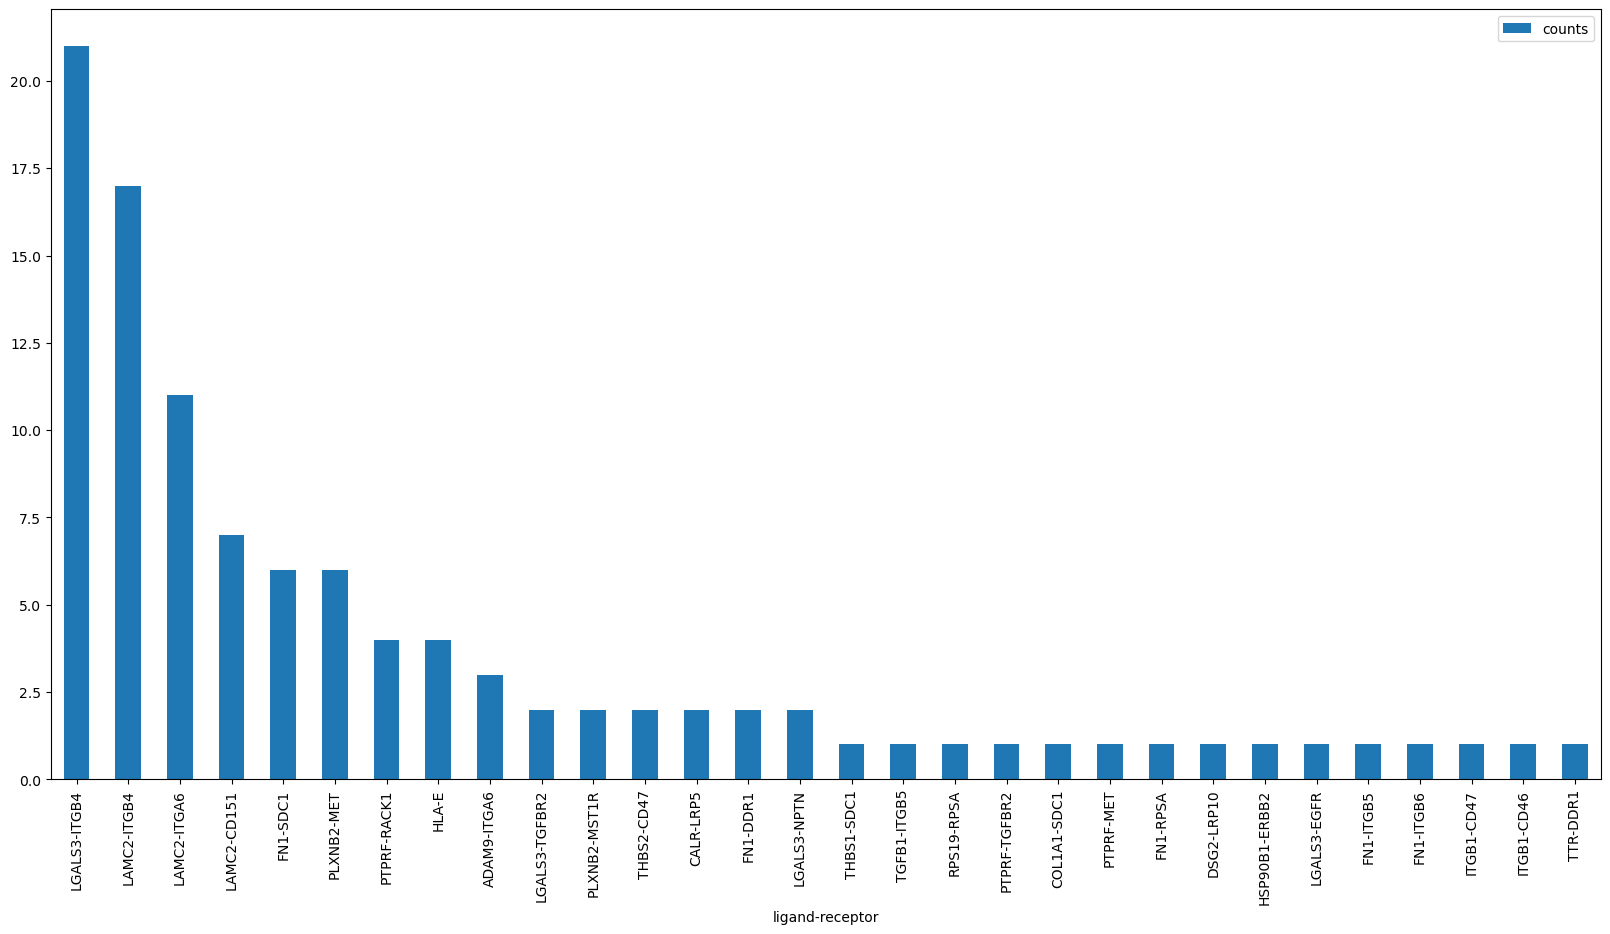

In [34]:
# Create a dataframe to store the abundance of each ligand-receptor pair when the endothelial column is non-zero
lr_abundance_df = matched_spots_df[matched_spots_df['Endothelial'] > 0]
# Count the frequency of each ligand-receptor pair, put them into a table
lr_abundance_table = lr_abundance_df.groupby('ligand-receptor').size().reset_index(name='counts')
# plot a histogram of the abundance of each ligand-receptor pair, sorted by the abundance
lr_abundance_table = lr_abundance_table.sort_values(by='counts', ascending=False)
# Plot the histogram and save it
import matplotlib.pyplot as plt
# Plot only the top 50 ligand-receptor pairs
lr_abundance_table = lr_abundance_table.head(50)
lr_abundance_table.plot(x='ligand-receptor', y='counts', kind='bar', figsize=(20,10))
# Save the plot
plt.savefig('lr_abundance_table.png')

In [20]:
lr_abundance_df

,from_cell,ligand-receptor,Endothelial,ClassicA,Fibroblast,Duct,Endocrine,Mixed,BasalB,NKCell,Acinar,BasalA,BPlasmaCell,ClassicB,TCell,Macrophage,Mast
46,ACTGTAGCACTTTGGA-1,THBS1-SDC1,0.333333,0.000000,0.666667,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
128,GCTCTCGGGTACCGAA-1,TTR-DDR1,0.111111,0.000000,0.000000,0.000,0.888889,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
148,GAGACTGATGGGTAGA-1,INS-HLA,0.125000,0.125000,0.000000,0.125,0.375000,0.250000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
176,GAGACTGATGGGTAGA-1,INS-HLA,0.125000,0.125000,0.000000,0.125,0.375000,0.250000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
305,GAGAGGTGCATTCTGG-1,TGFB1-ITGB5,0.333333,0.000000,0.666667,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
381,TTGTTCAGTGTGCTAC-1,CX3CL1-ITGB4,0.142857,0.428571,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.428571,0.0,0.000000,0.000000,0.0
385,GTGTATATCAGCGGGC-1,LAMC2-CD151,0.125000,0.250000,0.000000,0.625,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
401,GTGTATATCAGCGGGC-1,LAMC2-ITGB4,0.125000,0.250000,0.000000,0.625,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
402,GTGTATATCAGCGGGC-1,LAMC2-CD151,0.125000,0.250000,0.000000,0.625,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
440,GAGAGGTGCATTCTGG-1,TGFB1-ITGB5,0.333333,0.000000,0.666667,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
